In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\My_Python\BE\Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:\My_Python\BE\Classification\Classification_VGG.ipynb
D:\My_Python\BE\Classification\.ipynb_checkpoints\Classification_VGG-checkpoint.ipynb
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(1).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(10).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(100).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(11).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(12).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(13).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(14).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(15).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(16).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(17).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(18).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(19).jpg
D:\My_Python\BE\Classification\Testing\glioma_tumor\image(2).jpg
D

D:\My_Python\BE\Classification\Training\pituitary_tumor\p (490).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (491).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (492).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (493).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (494).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (495).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (496).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (497).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (498).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (499).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (5).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (50).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (500).jpg
D:\My_Python\BE\Classification\Training\pituitary_tumor\p (501).jpg
D:\My_Python\BE\Classification\Training\pituitary_t

In [2]:
train_dir="D:/My_Python/BE/Classification/Training"
test_dir="D:/My_Python/BE/Classification/Testing"

In [3]:
import cv2
import os
# Image preprocessing For No Tumor
no_tumor_dir="D:/My_Python/BE/Classification/Training/no_tumor"
images=[x for x in os.listdir(no_tumor_dir)]
for i in images:
    img=cv2.imread(no_tumor_dir+"/"+i)
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(no_tumor_dir+"/"+"aug"+i,resized)
    

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from tqdm import tqdm
from PIL import Image
import io

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB2
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, clear_output
import ipywidgets as widgets

In [5]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('D:/My_Python/BE/Classification','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('D:/My_Python/BE/Classification','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 215.23it/s]


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [7]:
from keras.preprocessing.image import ImageDataGenerator
trainDataGen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    zoom_range=0.2,
    
    
)
testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=128,
                                          subset='training'
                                         )
testGen=testDataGen.flow_from_directory(test_dir, target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=1)

valGen=trainDataGen.flow_from_directory(train_dir, target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=128,subset='validation')

Found 3296 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 364 images belonging to 4 classes.


In [8]:
from keras.models import Model
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D,Input,AveragePooling2D
from keras.applications.vgg16 import VGG16

base_model=VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

x=Flatten()(base_model.output)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.4)(x)
x=Dense(1024,activation='relu')(x)
out=Dense(4,activation='softmax')(x)

model=Model(inputs=base_model.inputs,outputs=out)
for layer in model.layers[:22]:
    
    layer.trainable=False

for layer in model.layers:
    print(layer.name," ",layer.trainable)
model.summary()

input_1   False
block1_conv1   False
block1_conv2   False
block1_pool   False
block2_conv1   False
block2_conv2   False
block2_pool   False
block3_conv1   False
block3_conv2   False
block3_conv3   False
block3_pool   False
block4_conv1   False
block4_conv2   False
block4_conv3   False
block4_pool   False
block5_conv1   False
block5_conv2   False
block5_conv3   False
block5_pool   False
flatten   False
dense   False
dropout   False
dense_1   True
dense_2   True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
__________________________________________________________

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks=[EarlyStopping(monitor='val_loss',patience=10), ModelCheckpoint(filepath="best_model.h5",monitor='val_loss',save_best_only=True)]


model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [10]:
steps_per_epochs=trainGen.samples//128
print(steps_per_epochs)
validation_steps_=valGen.samples//128
print(validation_steps_)

25
2


In [11]:
history=model.fit(trainGen,steps_per_epoch=steps_per_epochs,validation_data=valGen,epochs=50,validation_steps=validation_steps_,callbacks=callbacks)

Epoch 1/50
25/25 [==============================] - 279s 11s/step - loss: 1.9078 - accuracy: 0.3270 - val_loss: 1.0844 - val_accuracy: 0.5664
Epoch 2/50
25/25 [==============================] - 260s 10s/step - loss: 0.9932 - accuracy: 0.5846 - val_loss: 0.8441 - val_accuracy: 0.6523
Epoch 3/50
25/25 [==============================] - 262s 10s/step - loss: 0.7809 - accuracy: 0.7006 - val_loss: 0.6720 - val_accuracy: 0.7539
Epoch 4/50
25/25 [==============================] - 260s 10s/step - loss: 0.7143 - accuracy: 0.7180 - val_loss: 0.6547 - val_accuracy: 0.7617
Epoch 5/50
25/25 [==============================] - 259s 10s/step - loss: 0.7014 - accuracy: 0.7272 - val_loss: 0.6832 - val_accuracy: 0.7148
Epoch 6/50
25/25 [==============================] - 262s 10s/step - loss: 0.6433 - accuracy: 0.7432 - val_loss: 0.6541 - val_accuracy: 0.7461
Epoch 7/50
25/25 [==============================] - 263s 10s/step - loss: 0.5915 - accuracy: 0.7675 - val_loss: 0.5877 - val_accuracy: 0.7930
Epoch 

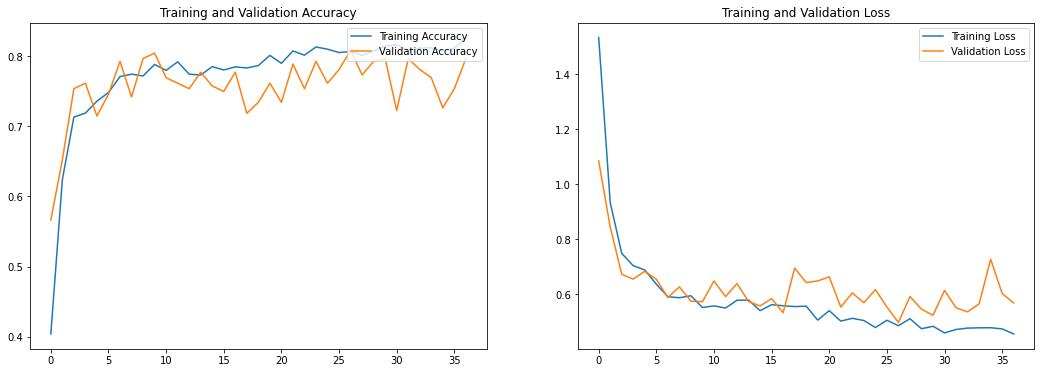

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [15]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.26      0.70      0.37       125
           2       0.10      0.07      0.08        92
           3       0.00      0.00      0.00        96

    accuracy                           0.23       406
   macro avg       0.09      0.19      0.11       406
weighted avg       0.10      0.23      0.13       406



c:\users\rushabh surana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rushabh surana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rushabh surana\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

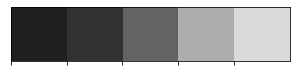

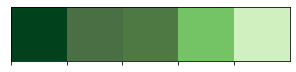

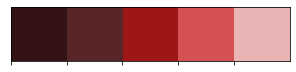

In [16]:
import seaborn as sns
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

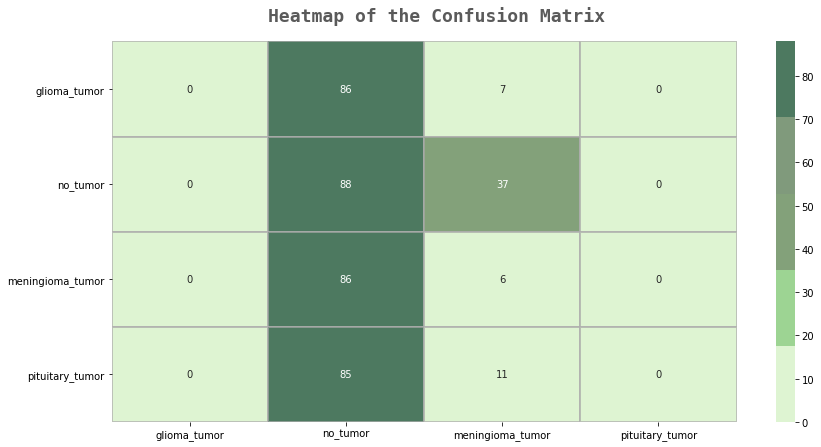

In [17]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [18]:
train_dir="D:/My_Python/BE/Classification/Training"
test_dir="D:/My_Python/BE/Classification/Testing"

In [19]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(224,224),
                                                                 label_mode = "categorical",
                                                                 batch_size = 32
                                                                 )
test_data =tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size =(224,224),
                                                               label_mode = "categorical",
                                                               batch_size = 32
                                                               )

Found 3660 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [22]:
# tunning the model
base_model.trainable = True
import tensorflow as tf
for layer in base_model.layers[:-1]:
    
    base_model.trainable = False

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = 'adam',
    metrics = ["accuracy"]
)

In [23]:
h_t=model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
115/115 [==============================] - 302s 3s/step - loss: 24.9442 - accuracy: 0.5528 - val_loss: 2.7323 - val_accuracy: 0.5660
Epoch 2/10
115/115 [==============================] - 302s 3s/step - loss: 0.7395 - accuracy: 0.8000 - val_loss: 1.8963 - val_accuracy: 0.6117
Epoch 3/10
115/115 [==============================] - 321s 3s/step - loss: 0.4640 - accuracy: 0.8504 - val_loss: 1.5169 - val_accuracy: 0.6675
Epoch 4/10
115/115 [==============================] - 313s 3s/step - loss: 0.4039 - accuracy: 0.8597 - val_loss: 1.7922 - val_accuracy: 0.6751
Epoch 5/10
115/115 [==============================] - 315s 3s/step - loss: 0.2899 - accuracy: 0.8999 - val_loss: 1.2328 - val_accuracy: 0.7335
Epoch 6/10
115/115 [==============================] - 311s 3s/step - loss: 0.2383 - accuracy: 0.9039 - val_loss: 1.5998 - val_accuracy: 0.6904
Epoch 7/10
115/115 [==============================] - 309s 3s/step - loss: 0.2144 - accuracy: 0.9155 - val_loss: 1.5074 - val_accuracy: 0.718

Evaluation after tuning

In [24]:
# evaluatinn the model
model_evaluation = model.evaluate(test_data)

13/13 [==============================] - 30s 2s/step - loss: 1.5871 - accuracy: 0.7462


In [25]:
print(f"Model Accuracy:{model_evaluation[1] *100: 0.2f} %")

Model Accuracy: 74.62 %


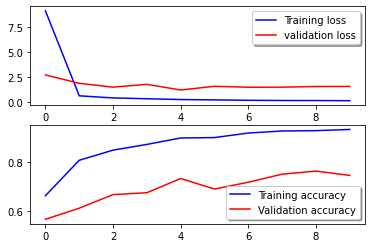

In [26]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(h_t.history['loss'], color='b', label="Training loss")
ax[0].plot(h_t.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(h_t.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(h_t.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [27]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [28]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        93
           1       0.00      0.00      0.00       125
           2       0.00      0.00      0.00        92
           3       1.00      1.00      1.00        96

    accuracy                           0.44       406
   macro avg       0.50      0.47      0.48       406
weighted avg       0.46      0.44      0.45       406



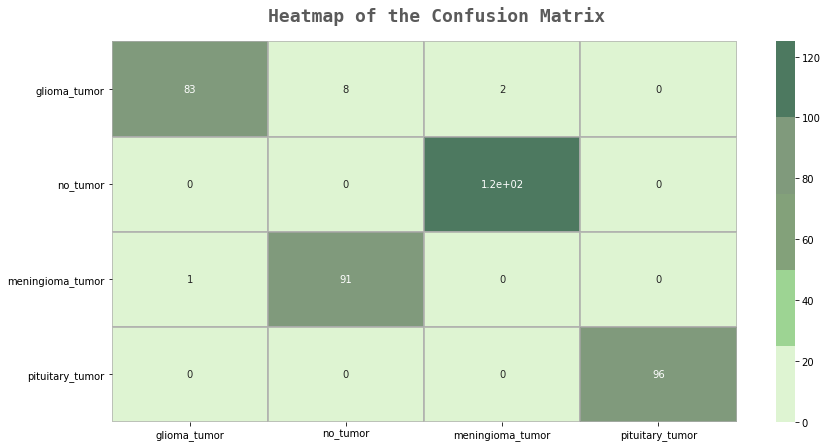

In [29]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [31]:
# To save the model:

from keras.models import save_model

# you can write whatever you desire instead of 'my_model'
# model = Your trained model
model.save('Classification_using_VGG')

# To load the model:

from keras.models import load_model

reconstructed_model = load_model("Classification_using_VGG")

INFO:tensorflow:Assets written to: Classification_using_VGG\assets
